# **Preparation**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from functools import reduce

# Set pandas to display all columns of a DataFrame when it is printed or shown in the console
pd.set_option('display.max_columns', None)

In [2]:
# Read Data from CSV
df = pd.read_csv("/content/FullReview.csv",sep=',',encoding='utf-8')
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN


# **Data Pre-Processing**

In [3]:
# Lower the alphabets
def lower_text(text):
    return text.lower()

def remove_trailing_alphabets(text):
    # Define the pattern to match multiple trailing alphabets
    trailing_alphabets_pattern = re.compile(r"([a-zA-Z])\1{2,}\b")
    
    # Remove multiple trailing alphabets from the text
    modified_text = trailing_alphabets_pattern.sub(r"\1", text)
    
    return modified_text

# Remove Number
def remove_number(text):
  return  re.sub(r"\d+", "", text)

# Remove special character
def remove_specialcharacters(text):
    return re.sub(r"(?:\@|https?\://)\S+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

#remove multiple whitespace into single whitespace
def remove_multiple_whitespace(text):
    return ' '.join(text.split())

# Function to remove emoticons from the text
def remove_emoticons(text):
    # Define the pattern for emoticons
    emoticon_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\u263A-\u263B"          # emoticons (Android)
                                  "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r"", text)

In [4]:
# Define the text preprocessing pipeline
preprocessing_pipeline = [
    remove_emoticons,
    lower_text,
    remove_number,
    remove_punctuation,
    remove_single_char,
    remove_multiple_whitespace,
    remove_specialcharacters,
    remove_trailing_alphabets
]

df['Label'] = df['Star'].map({1:0, 2:0, 3:0, 4:1, 5:1})

# Apply the preprocessing pipeline to the 'Review' column
df['FormattedReview'] = df['Review'].apply(lambda x: reduce(lambda res, func: func(res), preprocessing_pipeline, x))

# See the result
df.head(10)

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,FormattedReview
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnya bisa nulis review yang memuaskan lagi...
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya pi...
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadha...
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bua...
5,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Ibrohim Hanafi,Makananan seafoodnya enak banget.\nSangat reko...,5,NaN,1,makananan seafoodnya enak banget sangat rekome...
6,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Siska Mirawati,Pinggir pantai murah meriah.. Enak.. Ada homes...,5,NaN,1,pinggir pantai murah meriah enak ada homestay ...
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,NaN,1,melukiskan suasana hati yang sulit dijelaskan
8,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",rofiq r,"ini tempat langganan paling de best, tempatnya...",5,NaN,1,ini tempat langganan paling de best tempatnya ...
9,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Mugiyanto Alexsandi,"Kakapnya beda,,bawalnya beda,,dan,,recomendt b...",5,NaN,1,kakapnya bedabawalnya bedadanrecomendt bangeet...


In [5]:
# Tokenization
def tokenize_text(text):
    # Split the text into tokens based on whitespace
    tokenized_text = text.split()
    
    # Return the list of tokens
    return tokenized_text

# Apply the tokenize_text() function
df['Tokens'] = df['FormattedReview'].apply(lambda x: tokenize_text(x))
df.head()

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,FormattedReview,Tokens
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnya bisa nulis review yang memuaskan lagi...,"[akhirnya, bisa, nulis, review, yang, memuaska..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,"[cafe, de, paris, terletak, di, timur, pantai,..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya pi...,"[masakannya, enak, tp, kecil, sesuai, dg, harg..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadha...,"[ownernya, baik, banget, nginep, disini, pas, ..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bua...,"[tempatnya, bagus, bgt, makanan, enak, dan, co..."


In [6]:
# Load indonesian stopwords list from text

f = open("tala-stopwords-indonesia.txt", "r")
indonesian_stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    indonesian_stopword_list.append(line_list[0])
f.close()

print(f"Before Stopword List Length : {len(indonesian_stopword_list)}")

Before Stopword List Length : 758


In [7]:
# Tambahan indonesian stopwords
tambahan_indonesian_stopword = ['yg','dr','tp','jg','ala','agk','agak','pas', 'dg','dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh',
                       '&amp', 'yah', 'rb','bs','so']

indonesian_stopword_list.extend(tambahan_indonesian_stopword)

print(f"After Stopword List Length : {len(indonesian_stopword_list)}")

After Stopword List Length : 805


In [8]:
# Remove Stopwords
def stopword_removal(review):
    # Filter out stopwords from the input review tokens
    filtered_tokens = []
    for token in review:
      if token not in indonesian_stopword_list:
        filtered_tokens.append(token)

    # Return the filtered tokens
    return filtered_tokens

# Apply the stopword_removal() function to the 'tokens' column
df["Tokens_Without_Stopwords"] = df["Tokens"].apply(stopword_removal)

df.head(10)

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,FormattedReview,Tokens,Tokens_Without_Stopwords
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,NaN,1,akhirnya bisa nulis review yang memuaskan lagi...,"[akhirnya, bisa, nulis, review, yang, memuaska...","[nulis, review, memuaskan, enak, banget, ikan,..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,NaN,1,cafe de paris terletak di timur pantai parangt...,"[cafe, de, paris, terletak, di, timur, pantai,...","[cafe, de, paris, terletak, timur, pantai, par..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,NaN,1,masakannya enak tp kecil sesuai dg harganya pi...,"[masakannya, enak, tp, kecil, sesuai, dg, harg...","[masakannya, enak, sesuai, harganya, pisang, g..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,NaN,1,ownernya baik banget nginep disini pas ramadha...,"[ownernya, baik, banget, nginep, disini, pas, ...","[ownernya, banget, nginep, ramadhan, pesan, ma..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,NaN,1,tempatnya bagus bgt makanan enak dan cocok bua...,"[tempatnya, bagus, bgt, makanan, enak, dan, co...","[tempatnya, bagus, bgt, makanan, enak, cocok, ..."
5,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Ibrohim Hanafi,Makananan seafoodnya enak banget.\nSangat reko...,5,NaN,1,makananan seafoodnya enak banget sangat rekome...,"[makananan, seafoodnya, enak, banget, sangat, ...","[makananan, seafoodnya, enak, banget, rekomend..."
6,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Siska Mirawati,Pinggir pantai murah meriah.. Enak.. Ada homes...,5,NaN,1,pinggir pantai murah meriah enak ada homestay ...,"[pinggir, pantai, murah, meriah, enak, ada, ho...","[pinggir, pantai, murah, meriah, enak, homesta..."
7,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Erlina Wahyuni,Melukiskan suasana hati yang sulit dijelaskan,5,NaN,1,melukiskan suasana hati yang sulit dijelaskan,"[melukiskan, suasana, hati, yang, sulit, dijel...","[melukiskan, suasana, hati, sulit]"
8,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",rofiq r,"ini tempat langganan paling de best, tempatnya...",5,NaN,1,ini tempat langganan paling de best tempatnya ...,"[ini, tempat, langganan, paling, de, best, tem...","[langganan, de, best, tempatnya, nyaman, makan..."
9,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Mugiyanto Alexsandi,"Kakapnya beda,,bawalnya beda,,dan,,recomendt b...",5,NaN,1,kakapnya bedabawalnya bedadanrecomendt bangeet...,"[kakapnya, bedabawalnya, bedadanrecomendt, ban...","[kakapnya, bedabawalnya, bedadanrecomendt, ban..."


In [9]:
# # Function to count the percentage of punctuation marks in a text
# def count_punct(text):
#     # Count the number of punctuation marks in the text
#     count = sum([1 for char in text if char in string.punctuation])
    
#     # Calculate the percentage of punctuation marks (excluding spaces) in the text
#     percentage = round(count / (len(text) - text.count(" ")), 3) * 100
    
#     return percentage

# # Compute the length of each review (excluding spaces)
# df['ReviewLength'] = df['Review_Without_Stopwords'].apply(lambda x: len(x) - x.count(" "))

# # Compute the percentage of punctuation marks in each review 
# df['Punctuation'] = df['Review_Without_Stopwords'].apply(lambda x: count_punct(x))
# df.head()

In [10]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"Star 1 = {len(df[df['Star']==1])} rows")
print(f"Star 2 = {len(df[df['Star']==2])} rows")
print(f"Star 3 = {len(df[df['Star']==3])} rows")
print(f"Star 4 = {len(df[df['Star']==4])} rows")
print(f"Star 5 = {len(df[df['Star']==5])} rows")

Input data has 5566 rows and 10 columns
Star 1 = 227 rows
Star 2 = 102 rows
Star 3 = 331 rows
Star 4 = 1170 rows
Star 5 = 3736 rows


# **Visualize**

In [11]:
# Selecting negative and positive reviews
df_negative = df[(df['Star'] == 1) | (df['Star'] == 2) | (df['Star'] == 3)]
df_positive = df[(df['Star'] == 4) | (df['Star'] == 5)]

# Get the 'Tokens_Without_Stopwords' column from the negative and positive reviews
negative_list = df_negative['Tokens_Without_Stopwords'].tolist()
positive_list = df_positive['Tokens_Without_Stopwords'].tolist()

# Convert the lists of negative and positive reviews into a single string
filtered_negative = "".join(str(negative_list))
filtered_positive = "".join(str(positive_list))

# Convert the strings to lowercase
filtered_negative = filtered_negative.lower()
filtered_positive = filtered_positive.lower()

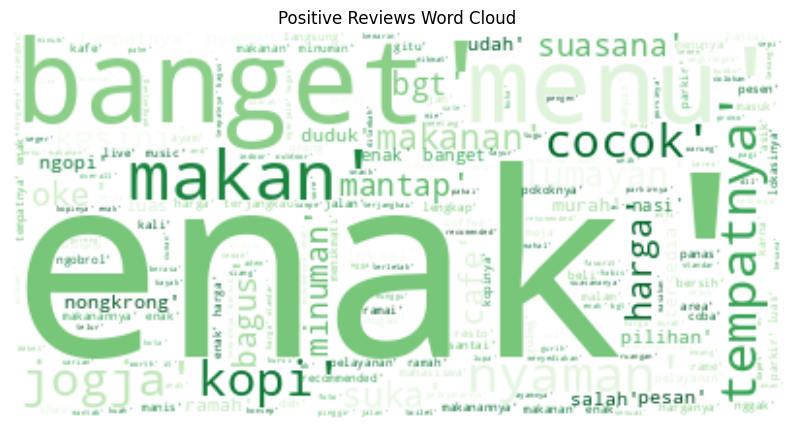

In [12]:
# Generate word cloud for positive reviews
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Greens").generate(filtered_positive)

# Create a figure and set its size
plt.figure(figsize=[10, 10])

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels and ticks
plt.axis("off")

# Remove any margins around the image
plt.margins(x=0, y=0)

# Set the title of the plot
plt.title("Positive Reviews Word Cloud")

# Show the plot
plt.show()

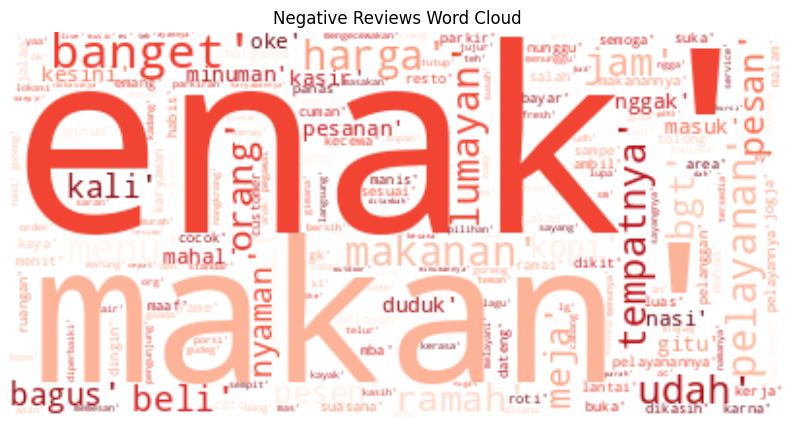

In [13]:
# Generate word cloud for negative reviews
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Reds").generate(filtered_negative)

# Create a figure and set its size
plt.figure(figsize=[10, 10])

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels and ticks
plt.axis("off")

# Remove any margins around the image
plt.margins(x=0, y=0)

# Set the title of the plot
plt.title("Negative Reviews Word Cloud")

# Show the plot
plt.show()


# **Data Conversion**

In [14]:
# Select the 'Tokens_Without_Stopwords' column from the DataFrame
clean_df = df.loc[:, ['Tokens_Without_Stopwords']]

# Convert list of words into a sentence
def toSentence(list_words):
    # Join the words in the list into a single string with spaces in between
    sentence = ' '.join(word for word in list_words)
    return sentence

# Apply the 'toSentence' function to create a new column 'kalimat'
clean_df['kalimat'] = clean_df['Tokens_Without_Stopwords'].apply(toSentence)

# Extract the 'kalimat' column as the final processed data
data_fix = clean_df['kalimat']

In [15]:
data_fix   = list(data_fix)
data_fix

['nulis review memuaskan enak banget ikan bakarnyaa makanan oke sentuhan bumbunya lupa kenalan super ramah couple goals haha hihi menua sehat janji deh suka banget masakan ibunya bule makan wisatawan lokal kalah dongggjelajahi wisata indonesia terima kasih bonus tunanya busempat galau kakap tuna ahirnya merasakan keduanyaa',
 'cafe de paris terletak timur pantai parangtritis akses jalan kaki parkiran makanannya pilihan seafood sayur minuman suasannya nyaman santai pilihan duduk ayunan tidur gantung gazebo konsep cafe pantai asik harga murah wisata worth it',
 'masakannya enak sesuai harganya pisang gorengnya mantap sambelnya mantap',
 'ownernya banget nginep ramadhan pesan makanan berbuka sahur tempatnya dibibir pantai tidur deru ombak laut anak senang puas main pasir ayunannya masyaallah nyaman harga aman kantong rutenya susah nek motor melewati sawah seru',
 'tempatnya bagus bgt makanan enak cocok istirahat',
 'makananan seafoodnya enak banget rekomendasi cari makanan khas pantai car

# **Labeling with Indobert**


In [16]:
!pip install transformers
!pip install xformers

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
hasil = pd.DataFrame(columns= ["text","status", "score"])
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [18]:
for i in range(0, len(data_fix)):
    result = sentiment_analysis(data_fix[i])
    status = label_index[result[0]['label']]
    score = result[0]['score']
    hasil2 = pd.DataFrame(({"text": data_fix[i], "status": status, "score": score}), index=[i])
    hasil = pd.concat([hasil, hasil2], ignore_index=True)
    
    print(f'Looping Progress: {i}')

Streaming output truncated to the last 5000 lines.
Looping Progress: 566
Looping Progress: 567
Looping Progress: 568
Looping Progress: 569
Looping Progress: 570
Looping Progress: 571
Looping Progress: 572
Looping Progress: 573
Looping Progress: 574
Looping Progress: 575
Looping Progress: 576
Looping Progress: 577
Looping Progress: 578
Looping Progress: 579
Looping Progress: 580
Looping Progress: 581
Looping Progress: 582
Looping Progress: 583
Looping Progress: 584
Looping Progress: 585
Looping Progress: 586
Looping Progress: 587
Looping Progress: 588
Looping Progress: 589
Looping Progress: 590
Looping Progress: 591
Looping Progress: 592
Looping Progress: 593
Looping Progress: 594
Looping Progress: 595
Looping Progress: 596
Looping Progress: 597
Looping Progress: 598
Looping Progress: 599
Looping Progress: 600
Looping Progress: 601
Looping Progress: 602
Looping Progress: 603
Looping Progress: 604
Looping Progress: 605
Looping Progress: 606
Looping Progress: 607
Looping Progress: 608
Loo

In [19]:
hasil['Sentiment'] = hasil['status'].map({'positive': 1, 'negative': 0, 'neutral': 0})

In [20]:
positive_df = hasil[hasil['Sentiment'] == 1]
positive_df

,text,status,score,Sentiment
0,nulis review memuaskan enak banget ikan bakarn...,positive,0.990178,1
1,cafe de paris terletak timur pantai parangtrit...,positive,0.997303,1
2,masakannya enak sesuai harganya pisang gorengn...,positive,0.998176,1
3,ownernya banget nginep ramadhan pesan makanan ...,positive,0.997936,1
4,tempatnya bagus bgt makanan enak cocok istirahat,positive,0.997762,1
...,...,...,...,...
5559,bersejarah,positive,0.991215,1
5560,terkenal sentra gudeg jogja soto ayam enak,positive,0.996646,1
5561,dibalik sempurna hikmah asrama mapk yogya shin...,positive,0.980866,1
5564,vibe sejarahnya dpt banget klasik,positive,0.991047,1


In [21]:
negative_df = hasil[hasil['Sentiment'] == 0]
negative_df

,text,status,score,Sentiment
7,melukiskan suasana hati sulit,negative,0.985824,0
40,doyan seblak cobain take away only,neutral,0.699381,0
47,perorang dikenakan biaya ribu dpt minum roti m...,neutral,0.977556,0
50,kali coba ruang tunggu eksekutif anggrek stasi...,neutral,0.512258,0
51,mengecewakan memesan tiket argo lawu luxury me...,negative,0.909118,0
...,...,...,...,...
5555,jalan unik kota jogja bentuknya terowongan,neutral,0.623847,0
5557,tanda memasuki wilayah kuliner gudeg …,neutral,0.922539,0
5558,melewati plengkung wijilan memasuki sentra gud...,neutral,0.893269,0
5562,salah plengkung utuh plengkung milik kraton ka...,neutral,0.975461,0


In [ ]:
df['Sentiment'] = hasil['Sentiment'].copy()

In [31]:
df

,Place_ID,Place_Name,User,Review,Star,Sentiment,Label,FormattedReview,Tokens,Tokens_Without_Stopwords
0,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Barep Pratama,Akhirnyaaaa bisa nulis review yang memuaskannn...,5,1,1,akhirnya bisa nulis review yang memuaskan lagi...,"[akhirnya, bisa, nulis, review, yang, memuaska...","[nulis, review, memuaskan, enak, banget, ikan,..."
1,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Luqman Heryana,Cafe de paris\nTerletak di timur pantai parang...,5,1,1,cafe de paris terletak di timur pantai parangt...,"[cafe, de, paris, terletak, di, timur, pantai,...","[cafe, de, paris, terletak, timur, pantai, par..."
2,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Catharine Winata,"masakannya enak tp kecil2 sesuai dg harganya😊,...",4,1,1,masakannya enak tp kecil sesuai dg harganya pi...,"[masakannya, enak, tp, kecil, sesuai, dg, harg...","[masakannya, enak, sesuai, harganya, pisang, g..."
3,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Dewi Pustaka,"Ownernya baik banget, nginep disini pas Ramadh...",5,1,1,ownernya baik banget nginep disini pas ramadha...,"[ownernya, baik, banget, nginep, disini, pas, ...","[ownernya, banget, nginep, ramadhan, pesan, ma..."
4,ChIJU39AYwyqey4RXFIG9IudN8M,""" Cafe de Paris "" Home Stay & Resto Seafood",Kiki Melaendo,"Tempatnya bagus bgt, makanan enak dan cocok bu...",5,1,1,tempatnya bagus bgt makanan enak dan cocok bua...,"[tempatnya, bagus, bgt, makanan, enak, dan, co...","[tempatnya, bagus, bgt, makanan, enak, cocok, ..."
...,...,...,...,...,...,...,...,...,...,...
5561,ChIJr6inCWRXei4Rws16u0e8YnA,꧋ꦄꦁꦏꦿꦶꦔꦤ꧀ꦥ꧀ꦭꦼꦁꦏꦸꦁꦮꦶꦗꦶꦭꦤ꧀ Angkringan Plengkung ...,Samsul Hadi,Ya ternyata dibalik belum sempurna ada hikmah....,5,1,1,ya ternyata dibalik belum sempurna ada hikmah ...,"[ya, ternyata, dibalik, belum, sempurna, ada, ...","[dibalik, sempurna, hikmah, asrama, mapk, yogy..."
5562,ChIJr6inCWRXei4Rws16u0e8YnA,꧋ꦄꦁꦏꦿꦶꦔꦤ꧀ꦥ꧀ꦭꦼꦁꦏꦸꦁꦮꦶꦗꦶꦭꦤ꧀ Angkringan Plengkung ...,Daru Hasta,Salah satu dari dua plengkung yang masih utuh ...,5,0,1,salah satu dari dua plengkung yang masih utuh ...,"[salah, satu, dari, dua, plengkung, yang, masi...","[salah, plengkung, utuh, plengkung, milik, kra..."
5563,ChIJr6inCWRXei4Rws16u0e8YnA,꧋ꦄꦁꦏꦿꦶꦔꦤ꧀ꦥ꧀ꦭꦼꦁꦏꦸꦁꦮꦶꦗꦶꦭꦤ꧀ Angkringan Plengkung ...,Siti Aminah,Katanya ada grosir kembang api nama tokonya ap...,2,0,0,katanya ada grosir kembang api nama tokonya ap...,"[katanya, ada, grosir, kembang, api, nama, tok...","[grosir, kembang, api, nama, tokonya]"
5564,ChIJr6inCWRXei4Rws16u0e8YnA,꧋ꦄꦁꦏꦿꦶꦔꦤ꧀ꦥ꧀ꦭꦼꦁꦏꦸꦁꦮꦶꦗꦶꦭꦤ꧀ Angkringan Plengkung ...,mario bastian,"vibe sejarahnya dpt banget , klasik",5,1,1,vibe sejarahnya dpt banget klasik,"[vibe, sejarahnya, dpt, banget, klasik]","[vibe, sejarahnya, dpt, banget, klasik]"


In [23]:
# # Define a function to apply sentiment analysis
# def analyze_sentiment(text):
#     print("Analyzing sentiment for:", text)
#     result = sentiment_analysis(text)[0]
#     label = result['label']
#     sentiment = label_index[label]
#     print("Sentiment:", sentiment)
#     return sentiment

# # Apply the sentiment analysis function
# df['Sentiment'] = df['Review'].apply(analyze_sentiment)

# **Feature Extraction**

In [24]:
# # Splitting the data into training and testing sets
# x = df[['Review_Without_Stopwords', 'ReviewLength', 'Punctuation']]
# y = df['Label']

# # Split the data using train_test_split function
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [25]:
# # Convert list values to string
# x_train['Review_Without_Stopwords'] = x_train['Review_Without_Stopwords'].apply(' '.join)
# x_test['Review_Without_Stopwords'] = x_test['Review_Without_Stopwords'].apply(' '.join)

# # TF-IDF vectorization
# tfidf = TfidfVectorizer(max_df=0.5, min_df=2)
# tfidf_train = tfidf.fit_transform(x_train['Review_Without_Stopwords'])
# tfidf_test = tfidf.transform(x_test['Review_Without_Stopwords'])

# # Concatenate the TF-IDF vectors with other features
# x_train_vect = pd.concat([x_train[['ReviewLength', 'Punctuation']].reset_index(drop=True),
#                           pd.DataFrame(tfidf_train.toarray())], axis=1)
# x_test_vect = pd.concat([x_test[['ReviewLength', 'Punctuation']].reset_index(drop=True),
#                          pd.DataFrame(tfidf_test.toarray())], axis=1)

# x_train_vect.head()

# **Various Algorithm to Test**

**MultiNomial Naive Bayes**

In [26]:
# # Convert column names to strings
# x_train_vect.columns = x_train_vect.columns.astype(str)
# x_test_vect.columns = x_test_vect.columns.astype(str)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(x_train_vect, y_train)
# naive_bayes_pred = classifier.predict(x_test_vect)

# # Classification Report
# print(classification_report(y_test, naive_bayes_pred))

# # Confusion Matrix
# class_label = ["negative", "positive"]
# df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
# sns.heatmap(df_cm, annot=True, fmt='d')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

# **Predict**

In [27]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 10)

# classifier.fit(tfidf_train, y_train)
# classifier.score(tfidf_test, y_test)

In [28]:
# data = ["Sayurnya Basi", "Bagus", "Pelayanannya Buruk", "Menunya Enak"]
# vect = tfidf.transform(data).toarray()

# my_pred = classifier.predict(vect)
# print(my_pred)

# **Export**

In [ ]:
df = df.drop('Place_Name', axis=1)
df = df.drop('Review', axis=1)

In [35]:
df = df.drop('Tokens', axis=1)
df = df.drop('Tokens_Without_Stopwords', axis=1)
df = df.drop('Label', axis=1)

In [36]:
df.head(10)

,Place_ID,User,Star,Sentiment,FormattedReview
0,ChIJU39AYwyqey4RXFIG9IudN8M,Barep Pratama,5,1,akhirnya bisa nulis review yang memuaskan lagi...
1,ChIJU39AYwyqey4RXFIG9IudN8M,Luqman Heryana,5,1,cafe de paris terletak di timur pantai parangt...
2,ChIJU39AYwyqey4RXFIG9IudN8M,Catharine Winata,4,1,masakannya enak tp kecil sesuai dg harganya pi...
3,ChIJU39AYwyqey4RXFIG9IudN8M,Dewi Pustaka,5,1,ownernya baik banget nginep disini pas ramadha...
4,ChIJU39AYwyqey4RXFIG9IudN8M,Kiki Melaendo,5,1,tempatnya bagus bgt makanan enak dan cocok bua...
5,ChIJU39AYwyqey4RXFIG9IudN8M,Ibrohim Hanafi,5,1,makananan seafoodnya enak banget sangat rekome...
6,ChIJU39AYwyqey4RXFIG9IudN8M,Siska Mirawati,5,1,pinggir pantai murah meriah enak ada homestay ...
7,ChIJU39AYwyqey4RXFIG9IudN8M,Erlina Wahyuni,5,0,melukiskan suasana hati yang sulit dijelaskan
8,ChIJU39AYwyqey4RXFIG9IudN8M,rofiq r,5,1,ini tempat langganan paling de best tempatnya ...
9,ChIJU39AYwyqey4RXFIG9IudN8M,Mugiyanto Alexsandi,5,1,kakapnya bedabawalnya bedadanrecomendt bangeet...


In [30]:
df.to_csv("Clean_FullReview.csv",index=False)